In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving NonDoh.csv to NonDoh.csv


In [ ]:
data=pd.read_csv("NonDoh.csv")
data

,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,Label
0,86.40,9.295160,60.0,54.0,NonDoH
1,9.00,3.000000,57.0,57.0,NonDoH
2,30.25,5.500000,60.5,60.5,NonDoH
3,6.25,2.500000,57.5,57.5,NonDoH
4,30.25,5.500000,60.5,60.5,NonDoH
5,30.25,5.500000,60.5,60.5,NonDoH
6,30.25,5.500000,60.5,60.5,NonDoH
7,30.25,5.500000,60.5,60.5,NonDoH
8,214.56,14.647867,64.2,60.0,NonDoH
9,347.04,18.629010,70.6,60.0,NonDoH


In [ ]:
data.head()


,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,Label
0,86.40,9.29516,60.0,54.0,NonDoH
1,9.00,3.00000,57.0,57.0,NonDoH
2,30.25,5.50000,60.5,60.5,NonDoH
3,6.25,2.50000,57.5,57.5,NonDoH
4,30.25,5.50000,60.5,60.5,NonDoH


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print('confusion matrix/n')
print(confusion_matrix(y_test, y_pred))
print('classification report/n')
print(classification_report(y_test, y_pred))

confusion matrix/n
[[4]]
classification report/n
              precision    recall  f1-score   support

      NonDoH       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [ ]:
error = []

# Calculating error for K values between 1 and 3
for i in range(1, 3):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

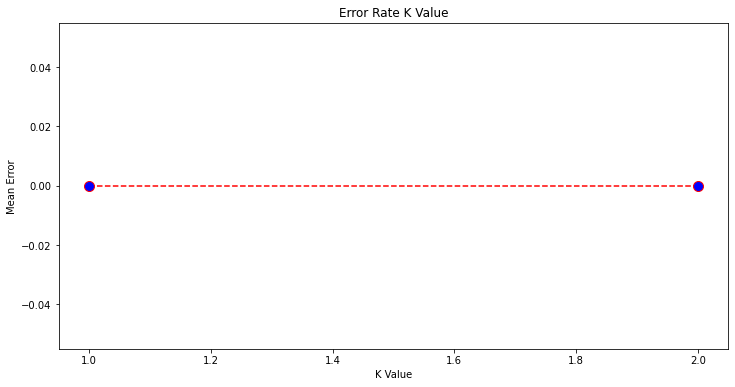

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 3), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')